# Dataset Description and Objective

The data set includes figures on 48,842 different records and 14 attributes for 42 nations. The 14 attributes consist of 8 categorical and 6 continuous attributes contains information on **age, education, nationality, marital status, relationship status, occupation, work classification, gender, race, working hours per week, capital loss and capital gain**

**The binomial label in the data set is the income level which predicts whether a person earns more than 50 Thousand Dollars per year or not based on the given set of attributes**

In [1]:
# Importing the required libraries

import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats # Statistics
import warnings
warnings.filterwarnings('ignore')# Avoid warnings

# Basic Pandas Operation

In [5]:
# Importing the data

data = pd.read_csv(r'C:\Users\Manoj\Downloads\adult.csv')

In [6]:
# Viewing the data

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
data.shape

(48842, 15)

There are 48842 records and 15 attributes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
# Statistical details of the dataframe 

data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Extracting Numerical columns

In [10]:
numerical_data = data.select_dtypes(['int64','float64'])

numerical_cols = numerical_data.columns

print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Extracting Categorical columns

In [11]:
categorical_data = data.select_dtypes(['object'])

categorical_cols = categorical_data.columns

print('Categorical Columns : {}'.format(list(categorical_cols)))

Categorical Columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


# Univariate Analysis

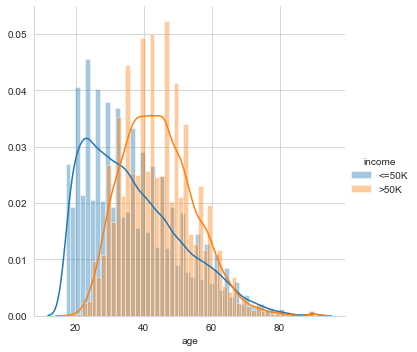

In [12]:
sns.FacetGrid(data, hue = "income", size = 5).map(sns.distplot, "age").add_legend()

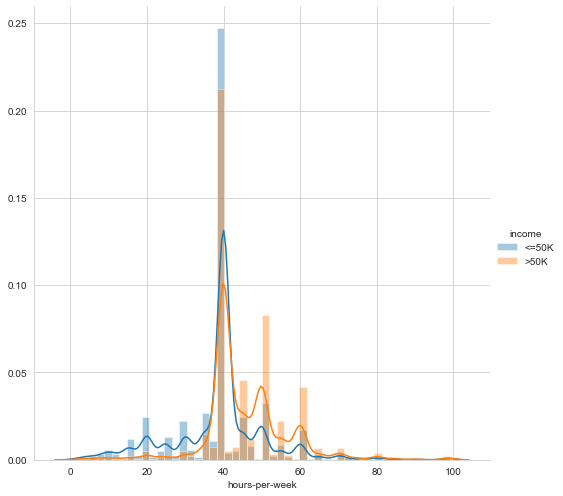

In [18]:
sns.FacetGrid(data, hue = "income", size = 7).map(sns.distplot, "hours-per-week").add_legend()

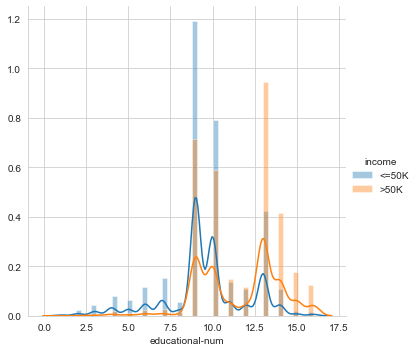

In [14]:
sns.FacetGrid(data, hue = "income", size = 5).map(sns.distplot, "educational-num").add_legend()

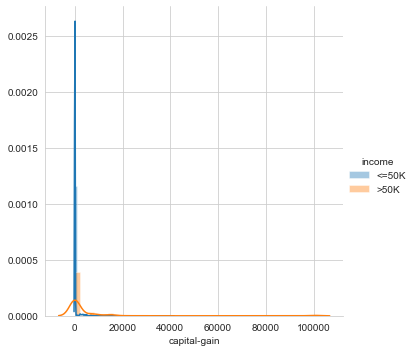

In [15]:
sns.FacetGrid(data, hue = "income", size = 5).map(sns.distplot, "capital-gain").add_legend()

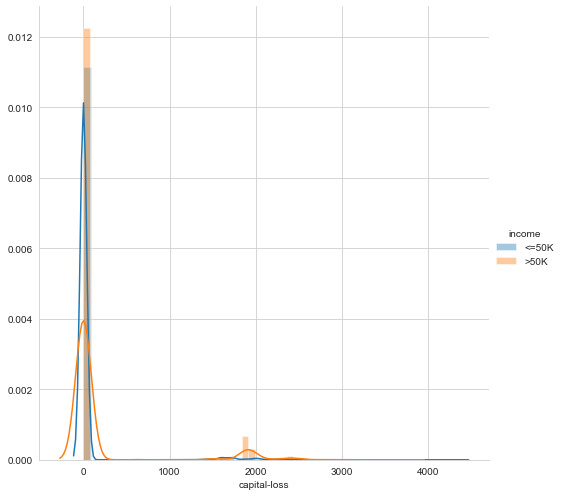

In [17]:
sns.FacetGrid(data, hue = "income", size = 7).map(sns.distplot, "capital-loss").add_legend()

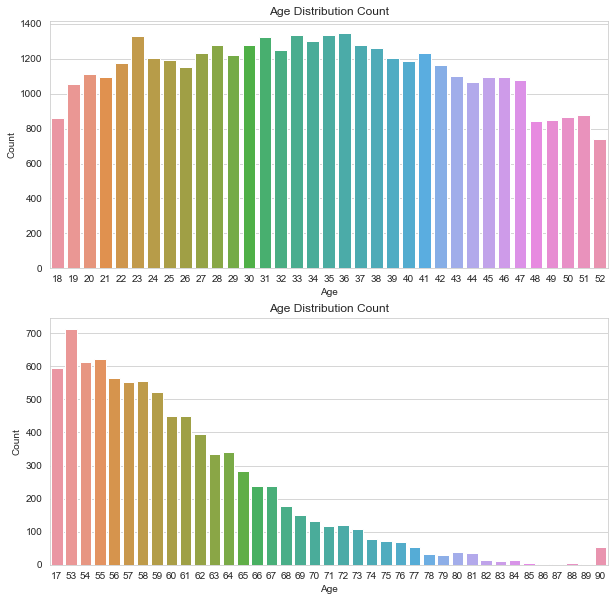

In [19]:
# Plotting Barplot to understand count of various age groups

plt.figure(figsize = (10,10))

x = list(data['age'].value_counts().index)

y = list(data['age'].value_counts())

plt.subplot(2,1,1)
sns.barplot(x= x[:35], y=y[:35])
plt.title('Age Distribution Count')
plt.xlabel('Age')
plt.ylabel('Count')


plt.subplot(2,1,2)
sns.barplot(x= x[35:], y=y[35:])
plt.title('Age Distribution Count')
plt.xlabel('Age')
plt.ylabel('Count')


plt.show()

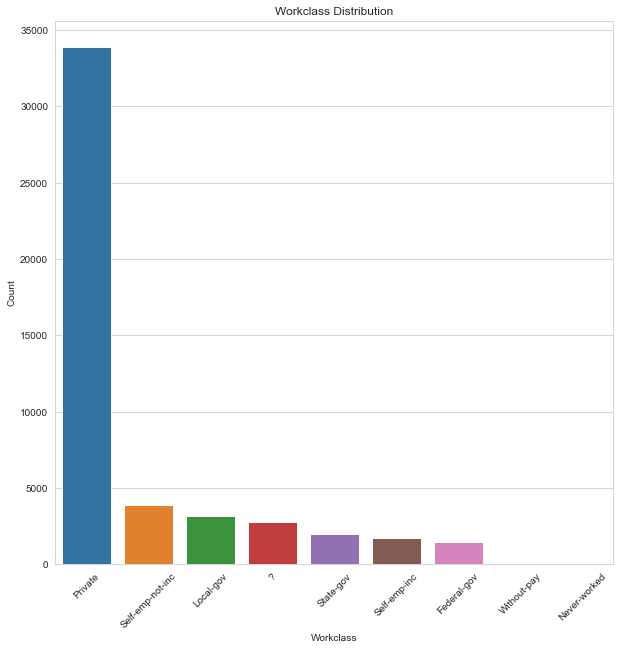

In [20]:
# Understanding Workclass of the population

plt.figure(figsize = (10,10))

x = list(data['workclass'].value_counts().index)

y = list(data['workclass'].value_counts())

plt.title('Workclass Distribution')

plt.xlabel('Workclass')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation=45)

plt.show()

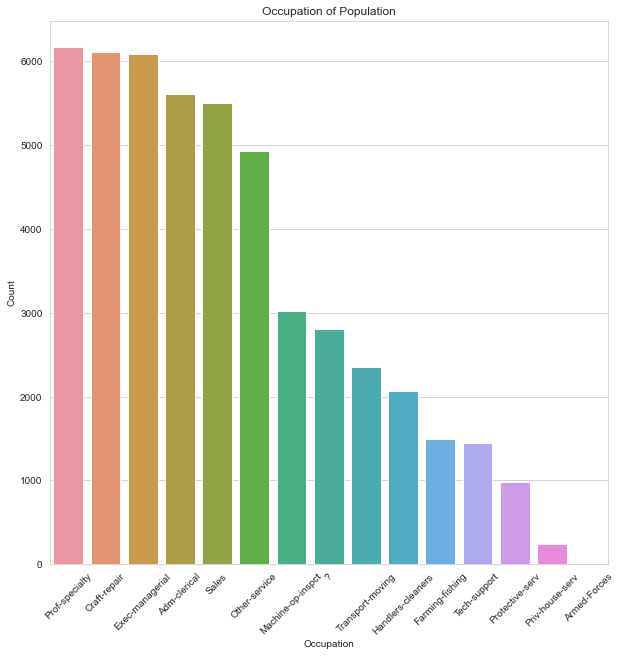

In [21]:
# Occupation Designation Distribution

plt.figure(figsize = (10,10))

x = list(data['occupation'].value_counts().index)

y = list(data['occupation'].value_counts())

plt.title('Occupation of Population')

plt.xlabel('Occupation')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation = 45)

plt.show()

# Bivariate Analysis

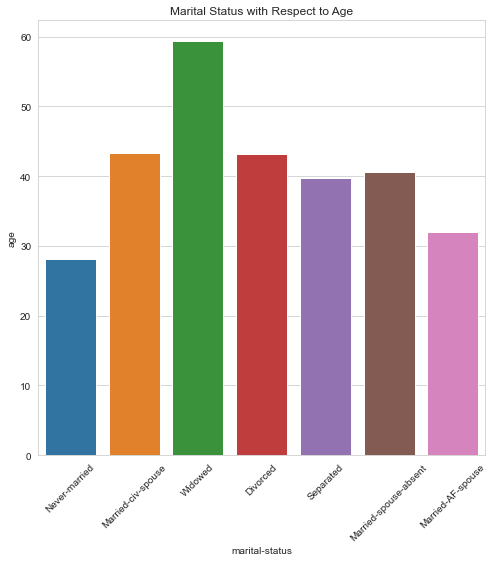

In [22]:
# Marital Status by Age Distribution

plt.figure(figsize=(8,8))

sns.barplot(x='marital-status',y='age',ci=None,data=data)

plt.title('Marital Status with Respect to Age')

plt.xticks(rotation=45)

plt.show()


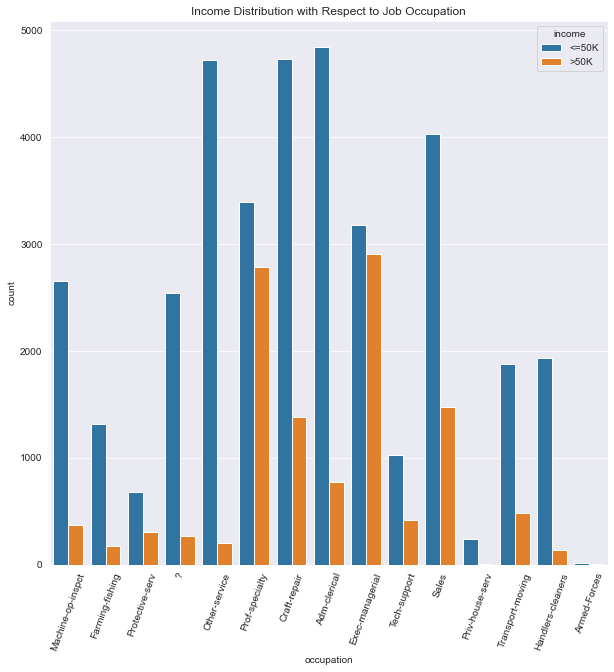

In [24]:
# Job Occupation with Respect to Income

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='occupation',hue='income',data=data)

plt.title('Income Distribution with Respect to Job Occupation')

plt.xticks(rotation=70)

plt.show()

<AxesSubplot:xlabel='income', ylabel='educational-num'>

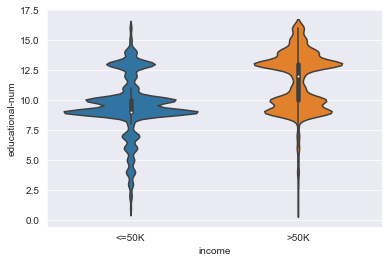

In [26]:
sns.violinplot(x = "income", y = "educational-num", data=data, size=10)

<AxesSubplot:xlabel='income', ylabel='age'>

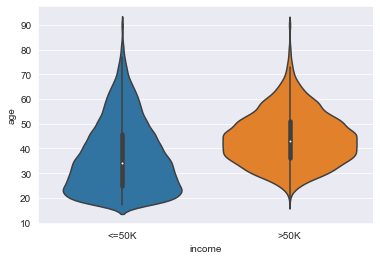

In [27]:
sns.violinplot(x = "income", y = "age", data=data, size=10)

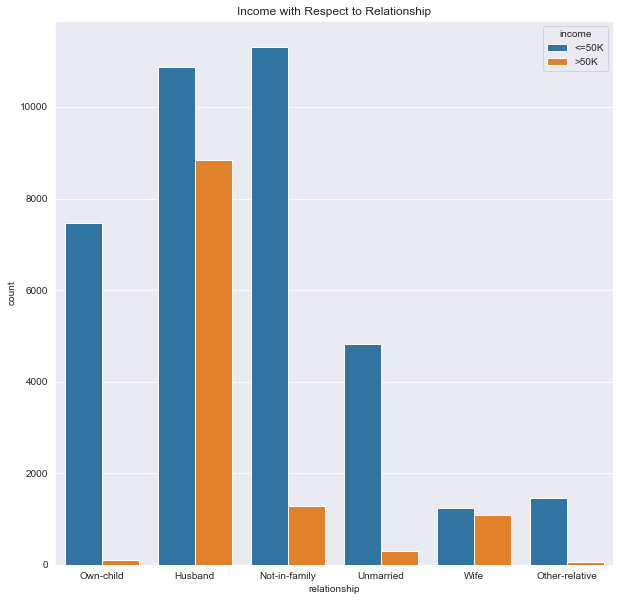

In [28]:
# Income with Respect to Relationship Status

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='relationship',hue='income',data=data)

plt.title('Income with Respect to Relationship')

plt.show()


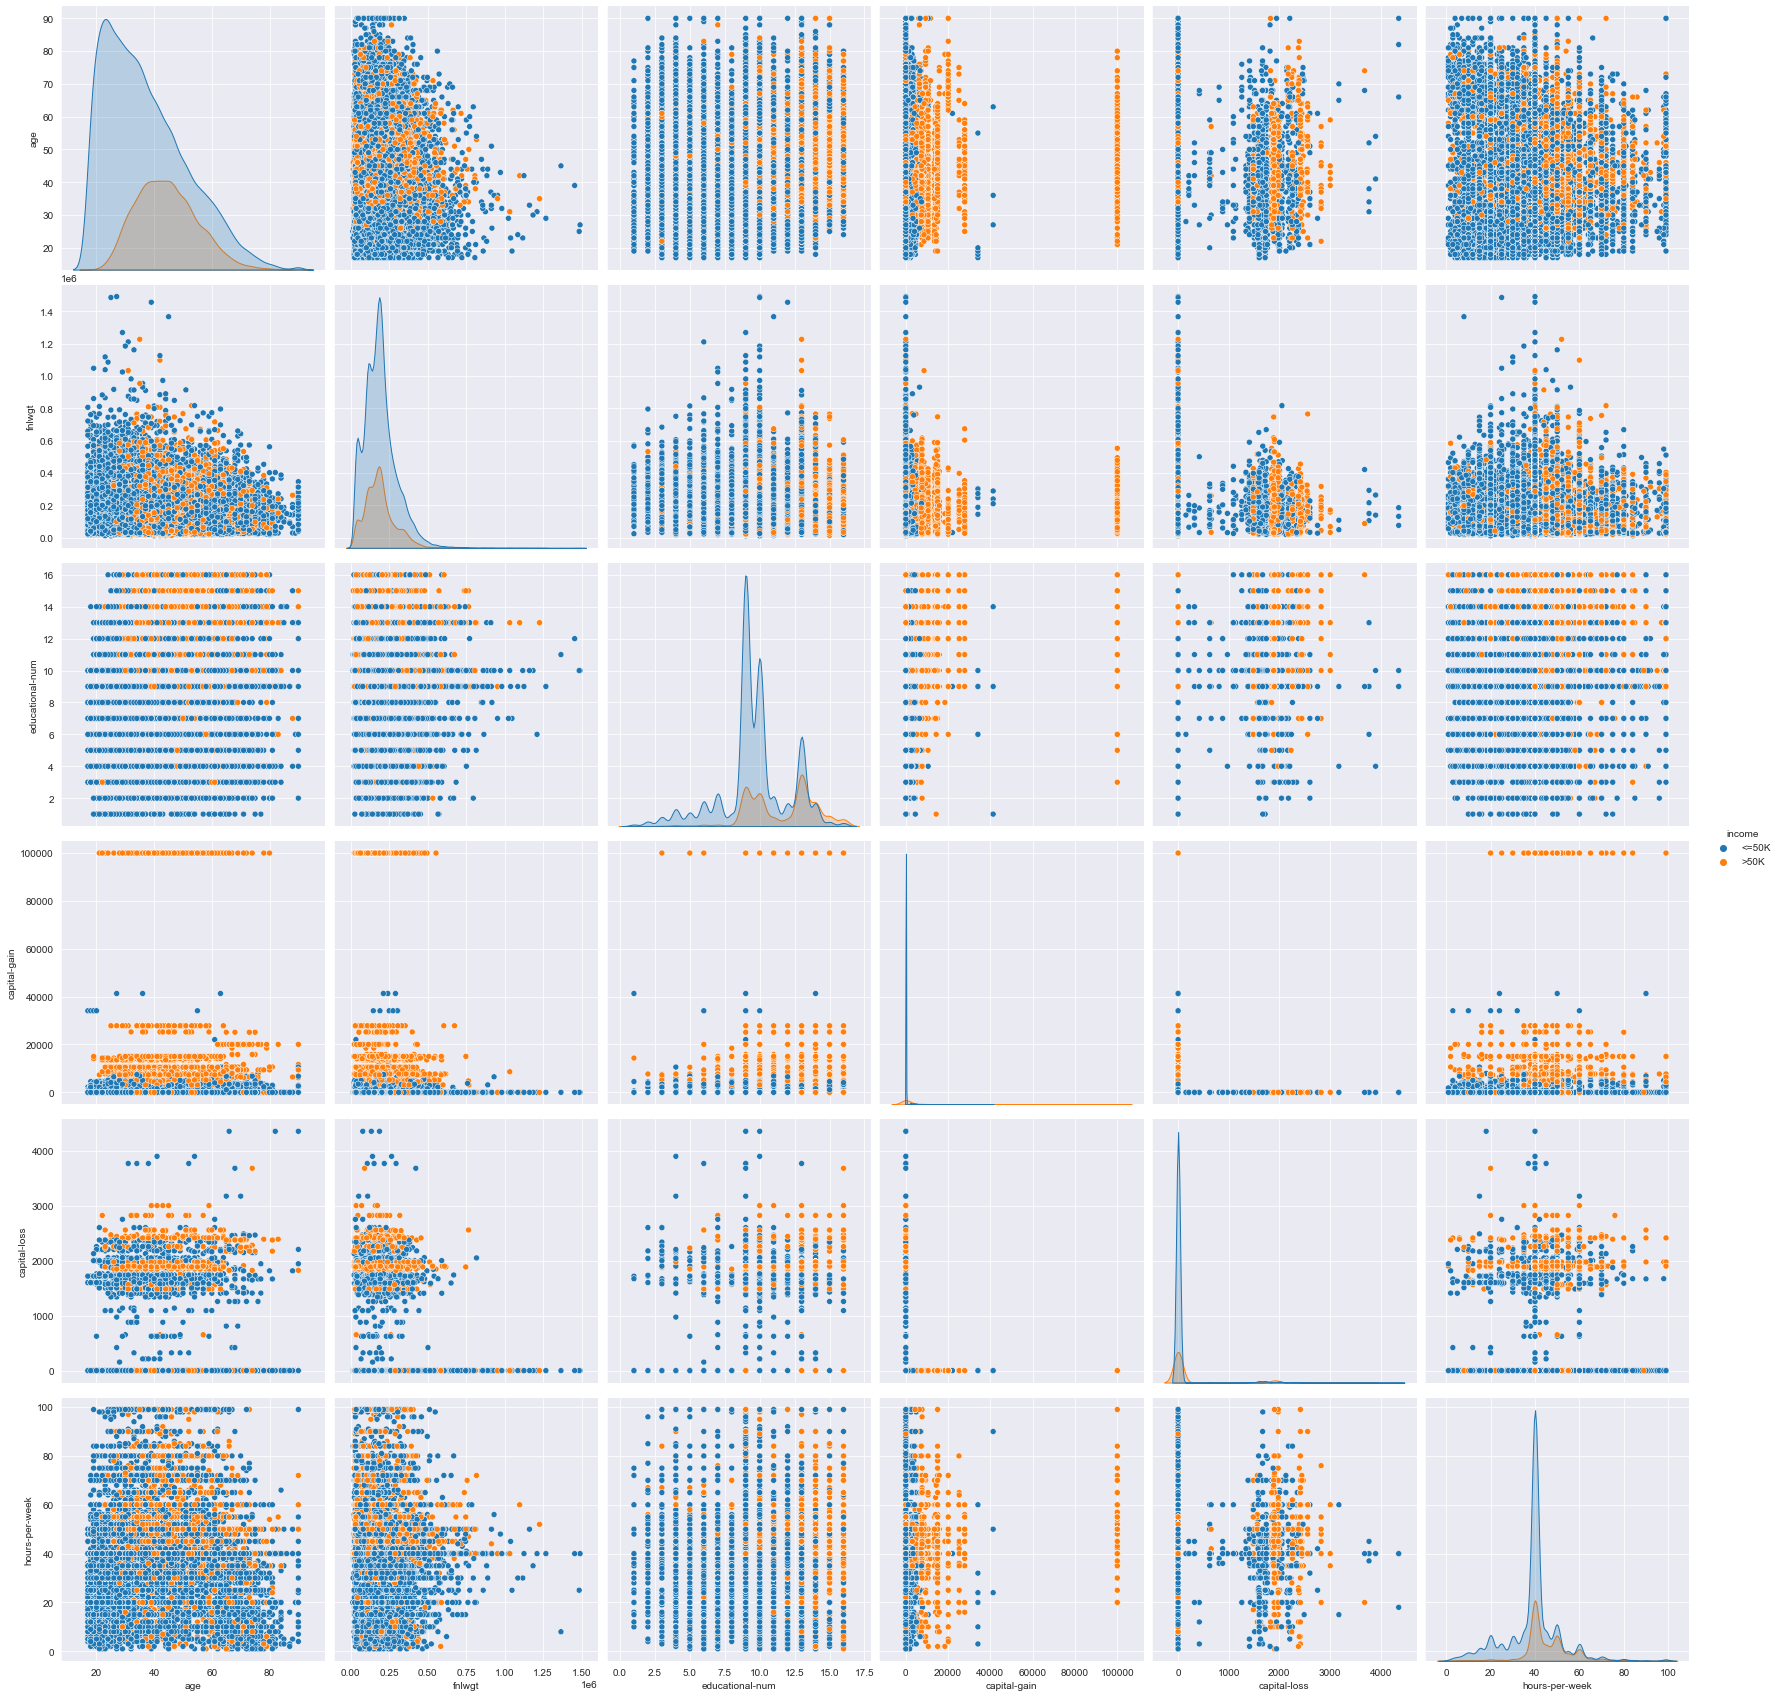

In [29]:
sns.pairplot(data, hue="income", size = 4)

# Outliers and Missing Values Treatment

In [30]:
# Null values exist in the dataset in the form of '?'

# Replacing ? with np.nan
columns = list(data.columns)

for col in columns:
    
    data[col] = data[col].replace('?',np.nan)

In [31]:
# Now we can see the null values 

a = data.isnull().any()

print(a)

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool


In [32]:
# Checking Total Missing values in columns containing missing values

li = list(a.index)

count = 0

null_count = {}

for col in li:
    
    if data[col].isnull().any() == True:
       
        count = data[col].isnull().sum()
        
        null_count[col] = count

print(null_count)

{'workclass': 2799, 'occupation': 2809, 'native-country': 857}


In [33]:
# Dropping Null values

data = data.loc[data['native-country'].notnull(), :]

data = data.loc[data['occupation'].notnull(), :]

data = data.loc[data['workclass'].notnull(), :]

In [34]:
data.isnull().any() # Removed Null values

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [36]:
# Dropping columns fnlwgt , capital-gain , and capital-loss as they are insignificant for us to derive any conclusions.

data.drop(columns=['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)

data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [37]:
numeric_data = data.select_dtypes(['int64','float64']).columns
numeric_data

Index(['age', 'educational-num', 'hours-per-week'], dtype='object')

In [38]:
# Number of Outliers in each feature (Numerical)

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage']) # Creating a new dataframe
    
for column in list(numeric_data): # Iterating thorough each feature 
        
    # first quartile (Q1)
    q1 = data[column].quantile(0.25) 
            
    # third quartile (Q3)
    q3 = data[column].quantile(0.75)
            
    # IQR
    iqr = q3 - q1
        
    fence_low = q1 - (1.5*iqr)
        
    fence_high = q3 + (1.5*iqr)
        
    # finding the number of outliers using 'and(|) condition. 
    total_outlier = data[(data[column] < fence_low) | (data[column] > fence_high)].shape[0]
    
    percent = (total_outlier / len(data[column])) * 100
        
    outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Number of Outliers,Percentage
0,age,269,0.594843
1,educational-num,294,0.650126
2,hours-per-week,11899,26.312414


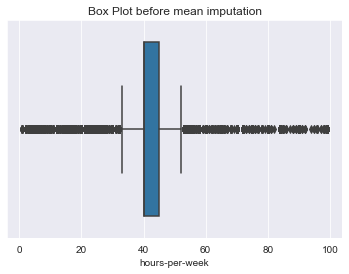

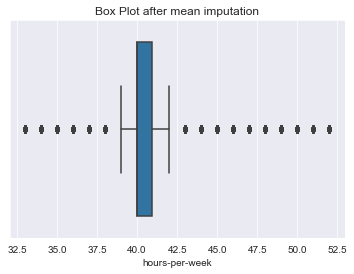

In [39]:
# Mean Imputation in column hours-per-week

sns.boxplot(data['hours-per-week'])

plt.title("Box Plot before mean imputation")
plt.show()
q1 = data['hours-per-week'].quantile(0.25)
q3 = data['hours-per-week'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(data['hours-per-week'])
for i in data['hours-per-week']:
    if i > Upper_tail or i < Lower_tail:
            data['hours-per-week'] = data['hours-per-week'].replace(i, m)
sns.boxplot(data['hours-per-week'])
plt.title("Box Plot after mean imputation")
plt.show()

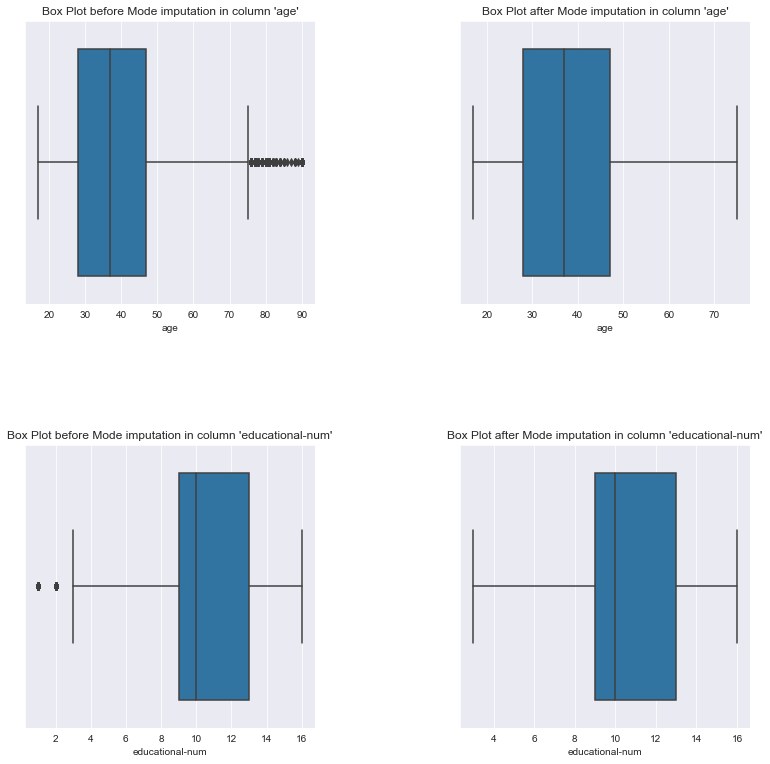

In [40]:
# Imputation - Imputing mode in columns having low percentage of outliers

plt.figure(figsize=(13,13))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
cols = list(outliers['Feature'].iloc[:2].values)
i = 1

for col in cols:

    plt.subplot(2,2,i)
    sns.boxplot(data[col])
    plt.title("Box Plot before Mode imputation in column '{}'".format(col))
    
    # Replacing Outliers
    q1 = data[col].quantile(0.25)
    
    q3 = data[col].quantile(0.75)
    
    # Iqr
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    m = data[col].mode()[0]
    
    for val in data[col]:
        
        if val > Upper_tail or val < Lower_tail:
            
                data[col] = data[col].replace(val, m)           
    plt.subplot(2,2,i+1)
    sns.boxplot(data[col])
    plt.title("Box Plot after Mode imputation in column '{}'".format(col))
    
    i = i+2

# Feature Transformation

In [41]:
# Data preprocessing - Standardising Numerical Columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical = data.select_dtypes(include=['int64', 'float64'])
    
df_num = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)

df_num.head()

,age,educational-num,hours-per-week
0,0.137931,0.307692,0.368421
1,0.362069,0.461538,0.894737
2,0.189655,0.692308,0.368421
3,0.465517,0.538462,0.368421
4,0.293103,0.230769,0.417790


In [42]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

categorical = data.select_dtypes('object')

df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
train_data = pd.concat([df_num,df_cat], axis = 1)

train_data.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.137931,0.307692,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.362069,0.461538,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.189655,0.692308,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.465517,0.538462,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.293103,0.230769,0.417790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
# Splitting the columns

X = train_data.iloc[:,:-1]

y = train_data.iloc[:,-1]

In [45]:
# Train test Split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.25, random_state=101)

# Building Machine Learning Models

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

clf_lr.fit(X_train, y_train)

# Prediction on Test Dataset

y_pred_lr = clf_lr.predict(X_test)

y_pred_lr

# Model Evaluation

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_lr)

0.8289403856359455

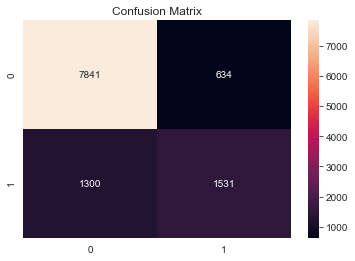

In [47]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 7)

clf_knn.fit(X_train,y_train)

# Prediction

y_pred_knn = clf_knn.predict(X_test)

y_pred_knn

# Model Evaluation 

print('Accuracy of KNN on training set: {:.2f}'
     .format(clf_knn.score(X_train, y_train)))
print('Accuracy of KNN on test set: {:.2f}'
     .format(clf_knn.score(X_test, y_test)))

Accuracy of KNN on training set: 0.86
Accuracy of KNN on test set: 0.81


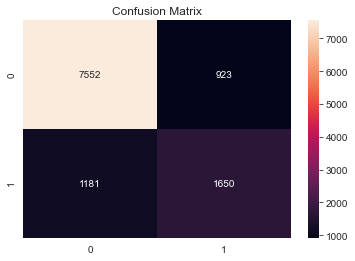

In [50]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

### SVM Kernel - Linear

In [51]:
from sklearn.svm import SVC 

clf_svc = SVC(kernel = 'linear')

clf_svc.fit(X_train, y_train)

# Prediction on test dataset

y_pred_svc = clf_svc.predict(X_test)
y_pred_svc

# Model Evaluation

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf_svc.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf_svc.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.83
Accuracy of Linear SVC classifier on test set: 0.83


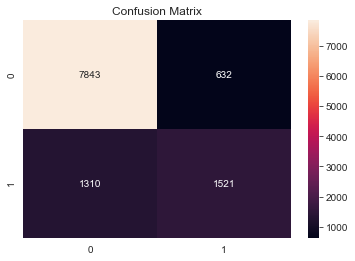

In [52]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

### Gaussian Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()

nbclf.fit(X_train,y_train)

# Prediction on test dataset

y_pred_gnb = nbclf.predict(X_test)
y_pred_gnb

print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Accuracy of Gaussian NB classifier on training set: 0.58
Accuracy of Gaussian NB classifier on test set: 0.57


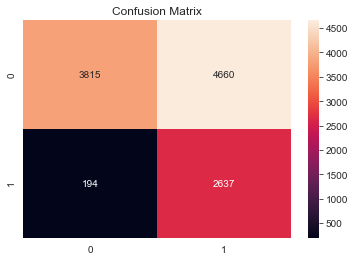

In [54]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()

clf_dt.fit(X_train, y_train)

# Prediction

y_pred_dt = clf_dt.predict(X_test)
y_pred_dt

# Evaluation of the model 

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.77


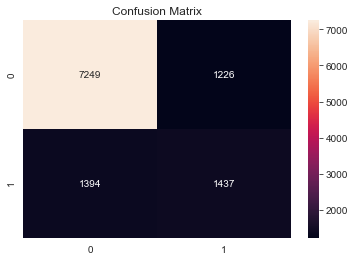

In [56]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier()

clf_rfc.fit(X_train, y_train)

# Prediction

y_pred_rfc = clf_rfc.predict(X_test)

# Model Evaluation

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_rfc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_rfc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.80


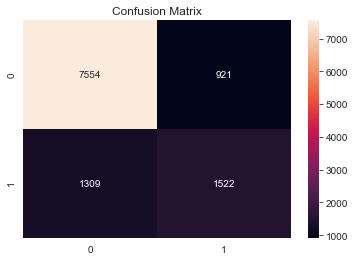

In [58]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()


### ExtraTree 

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

clf_etc = ExtraTreesClassifier(n_estimators=100, random_state=0)

clf_etc.fit(X_train, y_train)

# Prediction

y_pred_etc = clf_etc.predict(X_test)
y_pred_etc

# Evaluation of model

print('Accuracy of Extra Tree classifier on training set: {:.2f}'
     .format(clf_etc.score(X_train, y_train)))
print('Accuracy of Extra Tree classifier on test set: {:.2f}'
     .format(clf_etc.score(X_test, y_test)))

Accuracy of Extra Tree classifier on training set: 0.96
Accuracy of Extra Tree classifier on test set: 0.80


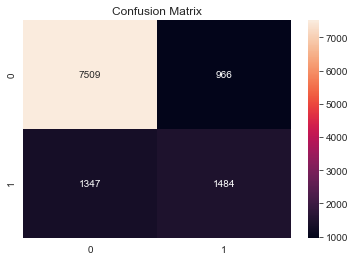

In [60]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_etc), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()